In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

import os
import sys
sys.path.append(os.path.abspath(".."))


number of events: 11952


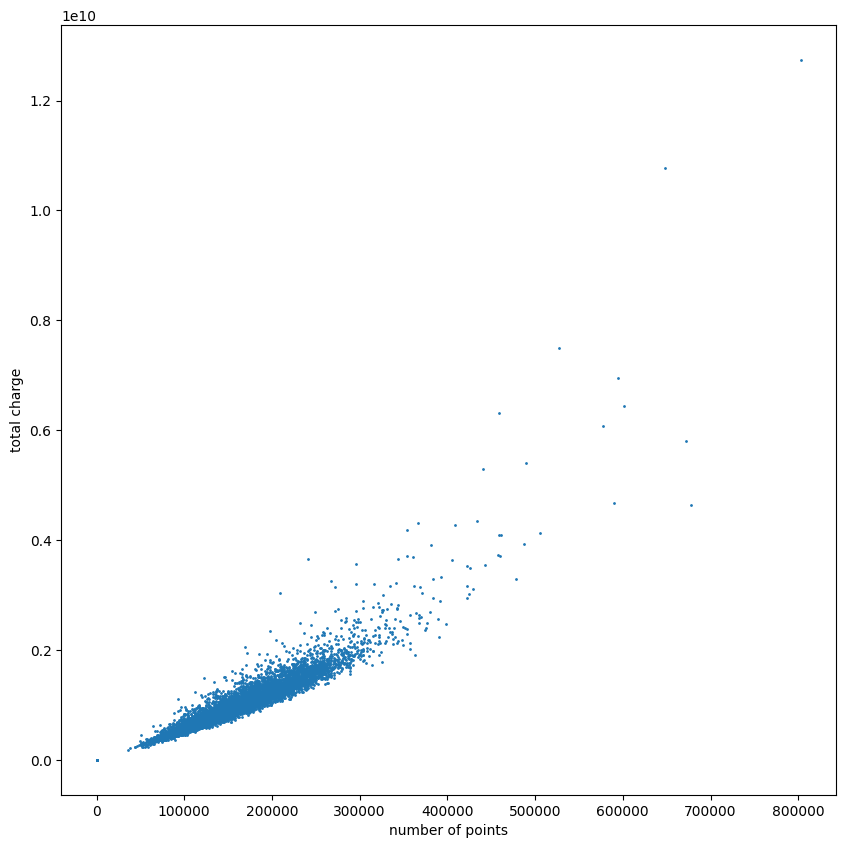

In [2]:
f = uproot.open("../input_files/bdt_convert_superunified_bnb_ncpi0_full_spacepoints.root")

num_events = 1000
num_events = len(f["wcpselection"]["T_BDTvars"]["nue_score"].array(library="np"))
print(f"number of events: {num_events}")

T_cluster_x = f["wcpselection"]["T_spacepoints"]["Tcluster_spacepoints_x"].array(library="np", entry_start=0, entry_stop=num_events)
T_cluster_y = f["wcpselection"]["T_spacepoints"]["Tcluster_spacepoints_y"].array(library="np", entry_start=0, entry_stop=num_events)
T_cluster_z = f["wcpselection"]["T_spacepoints"]["Tcluster_spacepoints_z"].array(library="np", entry_start=0, entry_stop=num_events)
T_cluster_q = f["wcpselection"]["T_spacepoints"]["Tcluster_spacepoints_q"].array(library="np", entry_start=0, entry_stop=num_events)


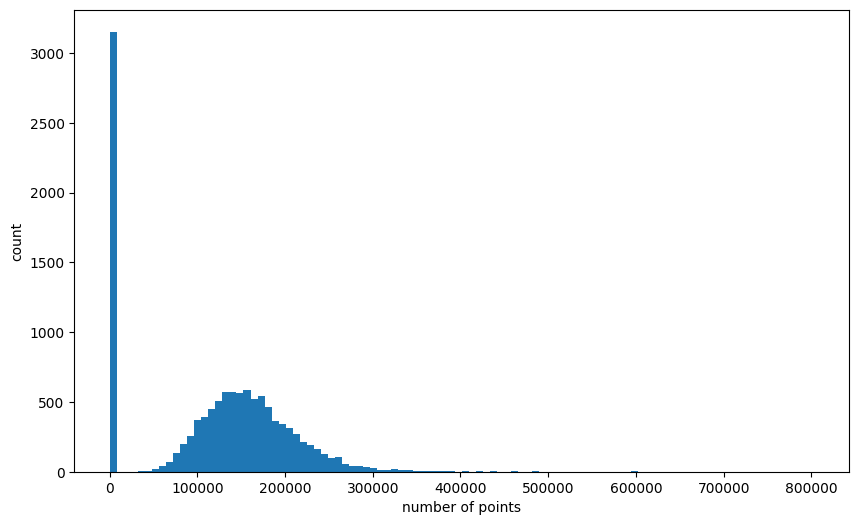

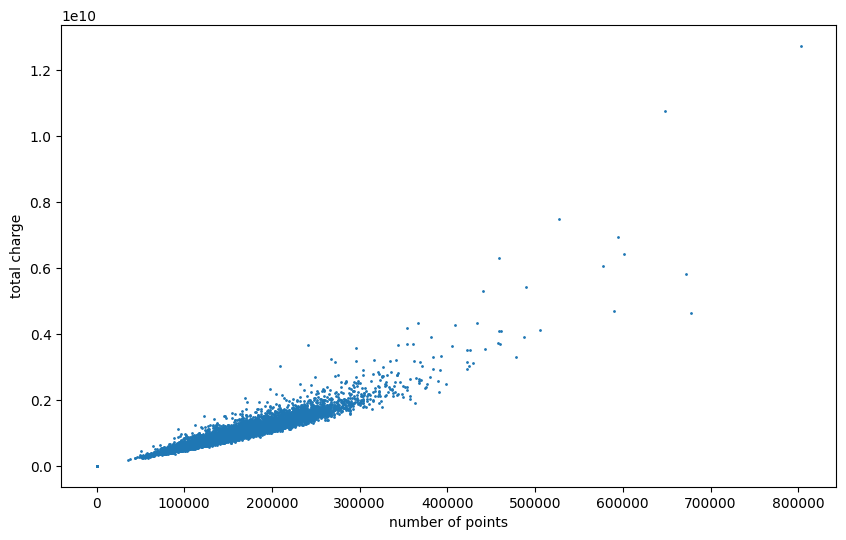

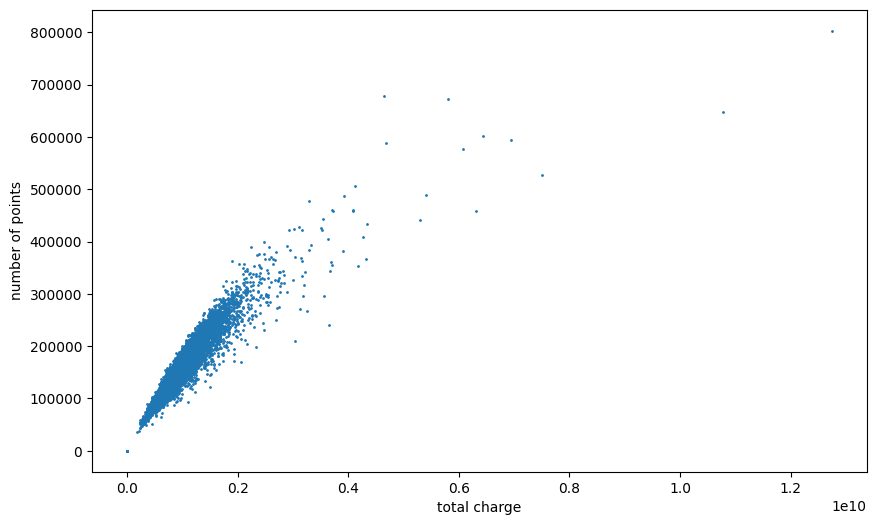

In [6]:
total_charge_per_event = []
total_num_points_per_event = []
for event_i in range(num_events):
    total_charge_per_event.append(np.sum(T_cluster_q[event_i]))
    total_num_points_per_event.append(len(T_cluster_x[event_i]))

plt.figure(figsize=(10, 6))
plt.hist(total_num_points_per_event, bins=100)
plt.xlabel("number of points")
plt.ylabel("count")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(total_num_points_per_event, total_charge_per_event, s=1)
plt.xlabel("number of points")
plt.ylabel("total charge")
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(total_charge_per_event, total_num_points_per_event, s=1)
plt.xlabel("total charge")
plt.ylabel("number of points")
plt.show()

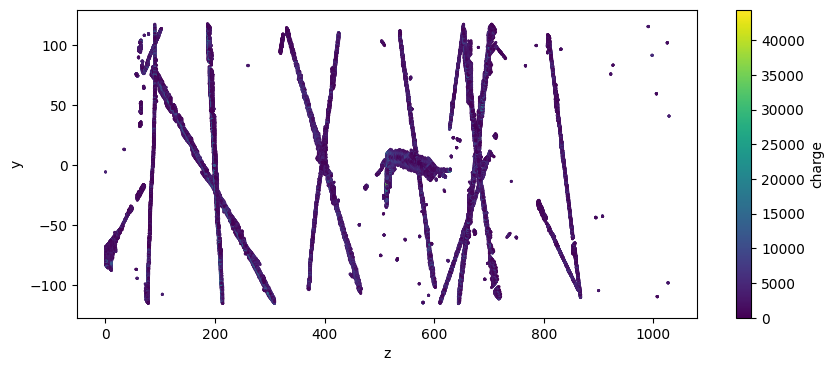

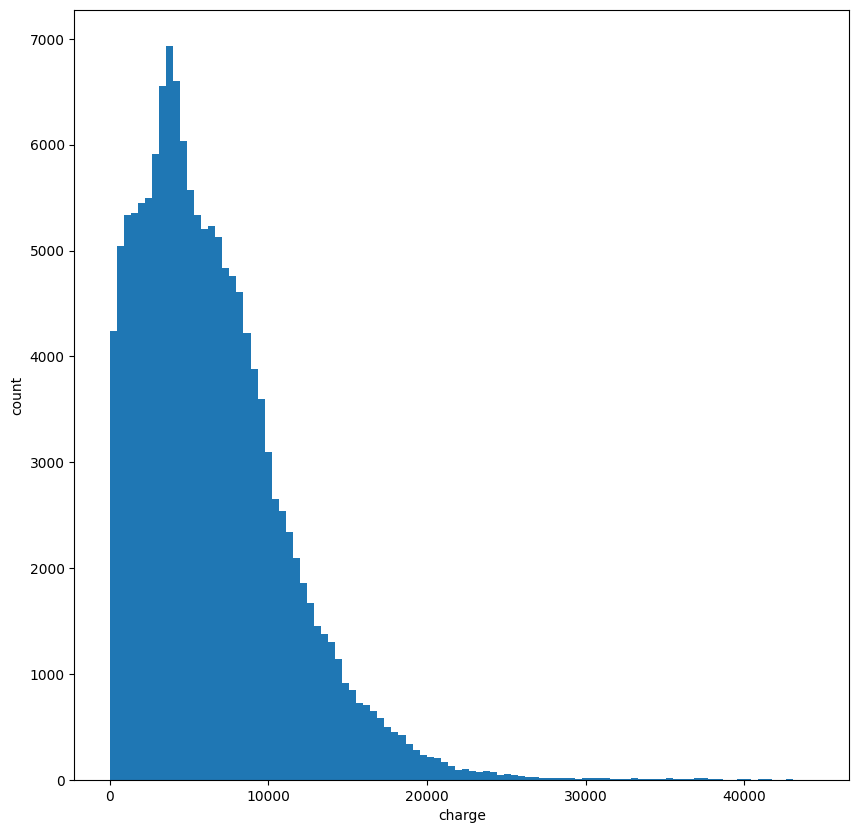

In [3]:
event_index = 0

plt.figure(figsize=(10, 4))
plt.scatter(T_cluster_z[event_index], T_cluster_y[event_index], c=T_cluster_q[event_index], s=1)
plt.colorbar(label="charge")
plt.xlabel("z")
plt.ylabel("y")
plt.show()

plt.figure(figsize=(10, 10))
plt.hist(T_cluster_q[event_index], bins=100)
plt.xlabel("charge")
plt.ylabel("count")
plt.show()
